## Historical VaR 

Using historical prices to predict the VaR by checking the 95th percentile in the asset's return distribution

Download the relevant libraries through pip install if not already available. TO check available libraries in your python environment - use command "!pip list" to see the list of libraries available

In [10]:
!pip list

Package                       Version
----------------------------- --------------------
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.4.2
anaconda-project              0.10.2
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astor                         0.8.1
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
autograd                      1.6.2
autograd-gamma                0.5.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backp

In [2]:
!pip install quandl

In [23]:
import pandas as pd
import numpy as np
from scipy import stats
import re
import quandl
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Get API key for Quandl package from Quandl.com to extract data for equity assets

eg : API key - "oQzFs3d57-NzpynZ-TVV"

In [3]:
quandl.ApiConfig.api_key = "oQzFs3d57-NzpynZ-TVV"

In [4]:
import sys
import os
sys.path.append("D:\Acad\Financial Engineering\data")

datas = pd.read_excel("D:\Acad\Financial Engineering\data\BSE_Top100_Security Name_Code.xlsx")
bse_code = 500325
company = "BSE/BOM"+str(bse_code)

my_data = quandl.get(company,start_date="2022-01-01",end_dat="2024-01-01",transformation="rdiff")
my_data["WAP"]*100
# returns = my_data[list(my_data.columns[my_data.columns.str.contains("WAP")])]
# returns = returns.rename(columns={"WAP":"{}".format(bse_code)})*100
# returns

Date
2022-01-04    1.650380
2022-01-05    0.665127
2022-01-06   -0.987222
2022-01-07    0.492968
2022-01-10   -0.181290
                ...   
2023-08-28   -0.372321
2023-08-29   -1.606031
2023-08-30    0.019795
2023-08-31   -0.531467
2023-09-01    0.046425
Name: WAP, Length: 413, dtype: float64

## Create portfolio of top 100 stocks by market capitalization 



In [5]:
bse_top100_codes = pd.read_excel("D:\Acad\Financial Engineering\data\BSE_Top100_Security Name_Code.xlsx")

#create list of BSE Quandl Codes of top N (<=100) stocks by market capitalization for input 
N = 10
bse_top100_codes.sort_values(by=["Market Cap"])
bse_codes_name = pd.DataFrame(bse_top100_codes,columns = ["Security Code","Security Name"])
bse_codes_name.loc[:,"quandle code"] = "BSE/BOM" + bse_codes_name["Security Code"].astype(str)
bse_codes_name

,Security Code,Security Name,quandle code
0,500325,RELIANCE INDUSTRIES LTD.,BSE/BOM500325
1,532540,TATA CONSULTANCY SERVICES LTD.,BSE/BOM532540
2,500180,HDFC Bank Ltd,BSE/BOM500180
3,532174,ICICI BANK LTD.,BSE/BOM532174
4,500209,INFOSYS LTD.,BSE/BOM500209
...,...,...,...
95,542830,Indian Railway Catering and Tourism Corporatio...,BSE/BOM542830
96,540762,Tube Investments of India Ltd,BSE/BOM540762
97,532321,Zydus Lifesciences Ltd,BSE/BOM532321
98,517334,Samvardhana Motherson International Ltd,BSE/BOM517334


### Create df with stock returns of Top 10 stocks 

In [6]:
N= 10
# create dataFrame of top 100 stocks WAP by Columns "Date" , "Security Names" 
my_data_100 = pd.DataFrame()
temp = []
m_cap = []


for i in range(10):
    comp_code = bse_codes_name["quandle code"][i]
    try:
        temp = quandl.get(comp_code,start_date="2022-01-01",end_dat="2024-01-01",transformation="rdiff")
    except:
        print("Error at "+ bse_codes_name["Security Name"][i])
        continue
    m_cap.append(bse_top100_codes["Market Cap"][i])
    my_data_100.insert(0,bse_codes_name["Security Name"][i], temp["WAP"])
        
my_data_100*100

Error at Life Insurance Corporation of India


,STATE BANK OF INDIA,HINDUSTAN UNILEVER LTD.,ITC LTD.,BHARTI AIRTEL LTD.,INFOSYS LTD.,ICICI BANK LTD.,HDFC Bank Ltd,TATA CONSULTANCY SERVICES LTD.,RELIANCE INDUSTRIES LTD.
Date,,,,,,,,,
2022-01-04,2.673236,0.990794,0.727223,1.222416,-1.021790,2.053871,1.140745,1.445956,1.650380
2022-01-05,2.073728,0.764081,0.040866,0.174981,-1.516959,2.021602,2.111815,-0.402618,0.665127
2022-01-06,0.237088,-0.669738,-0.685367,1.814043,-2.534188,-0.746411,-0.865748,-1.097573,-0.987222
2022-01-07,1.127582,0.955087,0.100544,-0.504845,0.412080,1.772628,0.825260,0.923392,0.492968
2022-01-10,0.715784,-0.155050,1.725791,-0.122965,1.908911,1.212692,0.338736,1.509801,-0.181290
...,...,...,...,...,...,...,...,...,...
2023-08-28,0.133039,-0.641233,-0.424442,-0.176739,-0.064856,0.031987,0.637985,0.142413,-0.372321
2023-08-29,0.437048,-0.477559,-0.548038,-1.641757,0.169299,0.211460,0.890566,0.054810,-1.606031
2023-08-30,-0.346376,-0.230470,0.308411,0.494436,0.784502,-0.588780,0.171882,0.642556,0.019795


In [13]:
N= 10
# create dataFrame of top 100 stocks WAP by Columns "Date" , "Security Names" 
my_data_100 = pd.DataFrame()
temp = []
m_cap = []

i = 0
while my_data_100.shape[1] < 10:
    comp_code = bse_codes_name["quandle code"][i]
    try:
        temp = quandl.get(comp_code,start_date="2022-01-01",end_dat="2024-01-01",transformation="rdiff")
    except:
        print("Error at "+ bse_codes_name["Security Name"][i])
        i += 1
        continue
    
    m_cap.append(bse_top100_codes["Market Cap"][i])
    my_data_100.insert(0,bse_codes_name["Security Name"][i], temp["WAP"])
    i += 1

my_data_100*100

Error at Life Insurance Corporation of India


,LARSEN & TOUBRO LTD.,STATE BANK OF INDIA,HINDUSTAN UNILEVER LTD.,ITC LTD.,BHARTI AIRTEL LTD.,INFOSYS LTD.,ICICI BANK LTD.,HDFC Bank Ltd,TATA CONSULTANCY SERVICES LTD.,RELIANCE INDUSTRIES LTD.
Date,,,,,,,,,,
2022-01-04,0.537931,2.673236,0.990794,0.727223,1.222416,-1.021790,2.053871,1.140745,1.445956,1.650380
2022-01-05,0.358082,2.073728,0.764081,0.040866,0.174981,-1.516959,2.021602,2.111815,-0.402618,0.665127
2022-01-06,-0.554799,0.237088,-0.669738,-0.685367,1.814043,-2.534188,-0.746411,-0.865748,-1.097573,-0.987222
2022-01-07,-1.049422,1.127582,0.955087,0.100544,-0.504845,0.412080,1.772628,0.825260,0.923392,0.492968
2022-01-10,1.206745,0.715784,-0.155050,1.725791,-0.122965,1.908911,1.212692,0.338736,1.509801,-0.181290
...,...,...,...,...,...,...,...,...,...,...
2023-08-28,1.028675,0.133039,-0.641233,-0.424442,-0.176739,-0.064856,0.031987,0.637985,0.142413,-0.372321
2023-08-29,1.189707,0.437048,-0.477559,-0.548038,-1.641757,0.169299,0.211460,0.890566,0.054810,-1.606031
2023-08-30,0.683128,-0.346376,-0.230470,0.308411,0.494436,0.784502,-0.588780,0.171882,0.642556,0.019795


Use below formula to calcualte weighted returns of this ficitonal portfolio

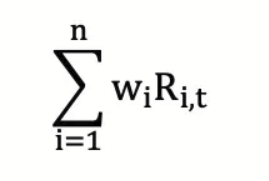

In [77]:
# Create weights basis market cap of Top N stocks
weights = (m_cap/sum(m_cap))*100

# create time series portoflio returns 
returns_portfolio = (weights*my_data_100).sum(axis = 1)

,Returns
Date,
2022-01-04,1.159638
2022-01-05,0.702484
2022-01-06,-0.506531
2022-01-07,0.346940
2022-01-10,0.822891
...,...
2023-08-28,0.135584
2023-08-29,0.082727
2023-08-30,0.198653


### Historical VaR 
Sort Values to get bottom 5th percentile for 5% VaR

We use "lower" as interpolation type since we are interested in actual losses , we can also use linearly interpolated VaR as well but standard practise is lower 5% percentile calculation

In [68]:
historic_var_val = np.percentile(returns_portfolio, 5, interpolation='lower')
historic_var_val

-1.4154801174765284

<AxesSubplot:>

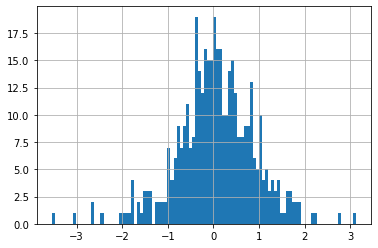

In [69]:
returns_portfolio.hist(bins=100)

In [70]:
print("skewness is {}".format(stats.skew(returns_portfolio)))
print("kutosis is {}".format(stats.kurtosis(returns_portfolio)))

skewness is -0.27794151417386115
kutosis is 1.4919011251345555


A normal distribution should have zero skew and, kurtosis of 3 but SciPy subtracts 3 to normalize it. Our distribution has negative skewness and fat tails

## Bootstrapping VaR 

Create samples with and without replacement to generate VaR from bootstrapped samples with VaR taken as mean of k times sampled data  

Create functions to sample series with or without replacement and calcualte VaR of each k sample  

In [71]:
def historic_VaR(data,level):
    return np.percentile(data,level,interpolation="lower")

    
def sample_with_replacement(data,func,level):
    # here the second argument is to ensure we get the same data but with different frequency of each data point - sampling with replacement
    sample = np.random.choice(data,len(data))
    return func(sample,level)

# Method to get sample of data with replacement and calculate VaR
# here func refers to method of calculating VaR on data series
def bs_sample_with_replacement(data,k,func,level):
    bs_sample_VaR = np.empty(k)
    for i in range(k):
        bs_sample_VaR[i] = sample_with_replacement(data,func,level)
    return bs_sample_VaR

Bootstrapped VaR series: [-1.35707838 -1.66921767 -1.41548012 ... -1.21818641 -1.46290636
 -1.6060578 ]
Mean VaR of bootstrapped data series is -1.4221605713164849


Text(0, 0.5, 'PDF')

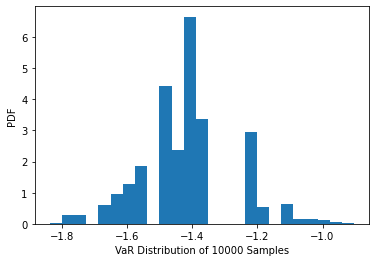

In [72]:
bs_VaR = bs_sample_with_replacement(returns_portfolio,10000,historic_VaR,5)
print("Bootstrapped VaR series: {}".format(bs_VaR))
print("Mean VaR of bootstrapped data series is {}".format(bs_VaR.mean()))

plt.hist(bs_VaR,bins=25, density=True)
plt.xlabel("VaR Distribution of 10000 Samples")
plt.ylabel("PDF")

### Calculate Confidence Interval of Bootstrapped VaR

for given level of confidence , we can calculate level/2 , 100 - level/2 percentile of returns distribution to get the confidence interval of bootstrapped VaR 

In [48]:
conf_intervals = np.percentile(bs_VaR, [2.5, 97.5])
print(f"The 95% VaR Confidence Interval is {conf_intervals}")

The 95% VaR Confidence Interval is [-1.66921767 -1.09473701]


## Calcualte Age Weighted VaR

We assign weights to recency of VaR value to incorporate any recent change in volatility , where weight wi to a return on day i is given as below

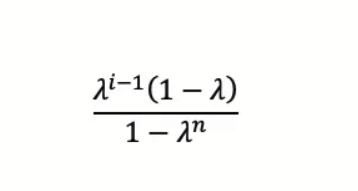

lambda refers to weight assigned to the recent most value , a value closer to zero means no weight is placed on older return values

In [106]:
# create lambda werighted array for returns array
n_data = len(returns_portfolio)
lam = 0.97
lam_wts = [ ((lam**(i-1))*(1-lam))/(1-lam**n_data) for i in range(1,n_data+1)]
lam_wts

[0.03000010324023902,
 0.029100100143031847,
 0.02822709713874089,
 0.027380284224578666,
 0.0265588756978413,
 0.025762109426906064,
 0.024989246144098882,
 0.024239568759775912,
 0.023512381696982634,
 0.022807010246073157,
 0.022122799938690964,
 0.02145911594053023,
 0.020815342462314323,
 0.020190882188444895,
 0.019585155722791545,
 0.0189976010511078,
 0.018427673019574563,
 0.01787484282898733,
 0.01733859754411771,
 0.016818439617794178,
 0.016313886429260353,
 0.01582446983638254,
 0.015349735741291065,
 0.014889243669052329,
 0.014442566358980759,
 0.014009289368211336,
 0.013589010687164995,
 0.013181340366550047,
 0.012785900155553545,
 0.012402323150886936,
 0.01203025345636033,
 0.01166934585266952,
 0.011319265477089434,
 0.01097968751277675,
 0.010650296887393445,
 0.010330787980771644,
 0.010020864341348494,
 0.009720238411108039,
 0.009428631258774797,
 0.009145772321011552,
 0.008871399151381206,
 0.00860525717683977,
 0.008347099461534576,
 0.008096686477688539,
 0

Sort returns portfolio by recency and add corresponding weights to each day alongwith cumulative weights

This Cumulative weight is taken as new percentile weight of the series whereras in regular estimation each data point has equal weight assigned while calculating percentile


In [171]:
# Sort returns portfolio by recent most date and take cumulative weights
returns_recent  = pd.DataFrame(returns_portfolio,columns=["Returns"])[::-1]
returns_recent.insert(1,"Weights",lam_wts)
sorted_returns_recent = returns_recent.sort_values(by="Returns")
sorted_returns_recent["Cumulative_Weights"] = sorted_returns_recent.Weights.cumsum()
sorted_returns_recent

# figure out the day and corresponding return when cumulative weights hits 5% level

sorted_returns_recent = sorted_returns_recent.reset_index()
var_idx = sorted_returns_recent[sorted_returns_recent.Cumulative_Weights <= 0.05].Returns.idxmax()
cum_levels = sorted_returns_recent.loc[var_idx:var_idx + 1]
cum_levels

,Date,Returns,Weights,Cumulative_Weights
49,2022-05-26,-0.809770,0.000002,0.048029
50,2023-07-25,-0.808262,0.013181,0.061210


In [206]:
# Find the interpolated value of returns when cumulative weights as 0.05
xp = cum_levels["Cumulative_Weights"]
yp = cum_levels["Returns"]
VaR_weighted = np.interp(0.05,xp,yp)
print("Age weighted 5% VaR is {}".format(VaR_weighted))

Age weighted 5% VaR is -0.8095448968857615


## Volatility Weighted VaR

This method adjusts the returns by incorporating volatility of asset on that day normalized by latest estimate of asset volatility. This method incorporates conditional voaltility wherein if the recent volatility has increased then using historical data will underestimate the volatility 

here the volatility is calculated on ith asset of the portfolio 

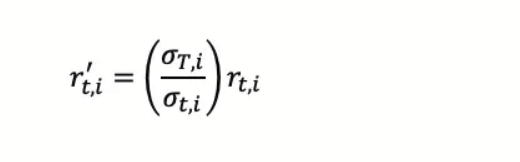

We estimate GARCH model to esimtate the volatility using ARCH library in python


In [179]:
!pip install arch

Calculate the volatility of each asset in portfolio

In [194]:
from arch import arch_model
vols = pd.DataFrame(index = returns_portfolio.index)
for asset in my_data_100:
    am = arch_model(my_data_100[asset])
    res = am.fit(disp="off")
    vols[asset+"_vols"] = res.conditional_volatility
vols

C:\Users\swapn\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001779. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\swapn\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001861. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\swapn\anaconda3\lib\site-packages\arch\univariate\base.py:311: Data

,LARSEN & TOUBRO LTD._vols,STATE BANK OF INDIA_vols,HINDUSTAN UNILEVER LTD._vols,ITC LTD._vols,BHARTI AIRTEL LTD._vols,INFOSYS LTD._vols,ICICI BANK LTD._vols,HDFC Bank Ltd_vols,TATA CONSULTANCY SERVICES LTD._vols,RELIANCE INDUSTRIES LTD._vols
Date,,,,,,,,,,
2022-01-04,0.014094,0.015401,0.011244,0.011524,0.013521,0.016042,0.013941,0.013910,0.012559,0.013376
2022-01-05,0.013751,0.016615,0.011144,0.011029,0.013469,0.015399,0.014254,0.013777,0.012571,0.013735
2022-01-06,0.013403,0.016720,0.010871,0.010575,0.013369,0.015930,0.014517,0.014212,0.012503,0.013211
2022-01-07,0.013154,0.015573,0.010546,0.010626,0.013385,0.017575,0.014217,0.013976,0.012478,0.012958
2022-01-10,0.013097,0.014959,0.010493,0.010320,0.013298,0.015050,0.014326,0.013728,0.012442,0.012482
...,...,...,...,...,...,...,...,...,...,...
2023-08-28,0.012174,0.011832,0.006941,0.011261,0.010675,0.014971,0.008788,0.009476,0.011234,0.011451
2023-08-29,0.012057,0.011430,0.007018,0.010871,0.010646,0.014961,0.008638,0.009433,0.011196,0.011176
2023-08-30,0.012011,0.011156,0.006957,0.010705,0.010750,0.014979,0.008501,0.009493,0.011157,0.011958


### Replace volatilities with most recent vol divided by each day's vol

In [205]:
adj_vol = vols.copy()
for asset in adj_vol:
    adj_vol[asset] = adj_vol[asset].apply(lambda x : adj_vol[asset][-1]/x)

vol_adj_return = pd.DataFrame(my_data_100.values*adj_vol.values,columns = my_data_100.columns,index = my_data_100.index)
adj_portfolio = (vol_adj_return*weights).sum(axis=1)

VaR_vol_weighted = historic_VaR(adj_portfolio,5)
print(f'The volitility weighted historical VaR is {VaR_vol_weighted}')

The volitility weighted historical VaR is -1.2501399745148158


In [207]:
vol_dict = {"Historcal":historic_var , "Age Weighted":VaR_weighted , "Volatility adjusted":VaR_vol_weighted}
vol_dict

{'Historcal': -1.4154801174765284,
 'Age Weighted': -0.8095448968857615,
 'Volatility adjusted': -1.2501399745148158}

Reference : https://medium.com/@matt_84072/historical-simulation-value-at-risk-explained-with-python-code-a904d848d146